# _Food Delivery Time Prediction Using Machine Learning_

<img src='https://storage.googleapis.com/kaggle-datasets-images/6360611/10279123/3415b18b027a097fc8554b60c66f8839/dataset-cover.jpg?t=2024-12-23-13-23-35'>

## 📌 _Proje Açıklaması_
_Bu proje, yemek teslimat sürelerini tahmin etmek amacıyla geliştirilmiş bir **Machine Learning regression** çalışmasıdır. Çalışmanın temel amacı, geçmiş teslimat verilerini kullanarak bir siparişin müşteriye ne kadar sürede ulaştırılacağını önceden tahmin etmektir._

_Model, teslimat mesafesi başta olmak üzere; hava durumu, trafik yoğunluğu, günün zamanı, kullanılan araç türü, sipariş hazırlık süresi ve kurye deneyimi gibi birçok faktörü dikkate alarak **Delivery_Time_min** değişkenini tahmin etmektedir. Bu sayede, gerçek hayattaki food delivery platformlarının (Zomato, Swiggy vb.) kullandığı tahmin sistemlerine benzer bir yapı oluşturulmuştur._

_Bu proje, lojistik, operasyonel verimlilik ve zaman tahmini problemleriyle ilgilenen veri bilimi uygulamaları için pratik bir örnek sunmaktadır._

## 📊 _Veri Seti Sütun Açıklamaları_

_- **Order_ID**  
  Her bir sipariş için oluşturulmuş benzersiz kimlik numarasıdır. Modelleme sürecinde tahmin gücüne katkı sağlamadığı için feature setinden çıkarılmıştır._

_- **Distance_km**  
  Restoran ile müşteri arasındaki teslimat mesafesini kilometre cinsinden ifade eder. Teslimat süresini doğrudan etkileyen en önemli değişkenlerden biridir._

_- **Weather**  
  Teslimat sırasında geçerli olan hava durumu bilgisini içerir. Clear, Rainy, Snowy, Foggy ve Windy gibi kategorik değerler alır._

_- **Traffic_Level**  
  Teslimat süresince karşılaşılan trafik yoğunluğunu belirtir. Low, Medium ve High olmak üzere üç farklı kategori içerir._

_- **Time_of_Day**  
  Teslimatın gerçekleştiği zaman dilimini ifade eder. Morning, Afternoon, Evening ve Night kategorilerinden oluşur._

_- **Vehicle_Type**  
  Teslimatın hangi araç türü ile yapıldığını belirtir. Bike, Scooter ve Car gibi kategorik değerler içerir._

_- **Preparation_Time_min**  
  Siparişin restoranda hazırlanma süresini dakika cinsinden gösterir. Toplam teslimat süresine doğrudan etki eden bir faktördür._

_- **Courier_Experience_yrs**  
  Teslimatı gerçekleştiren kuryenin kaç yıllık deneyime sahip olduğunu belirtir. Deneyim arttıkça teslimat süresinin azalması beklenmektedir._

_- **Delivery_Time_min (Target Variable)**  
  Siparişin restorandan müşteriye teslim edilmesine kadar geçen toplam süreyi dakika cinsinden ifade eder. Bu proje kapsamında tahmin edilmeye çalışılan hedef değişkendir._

## _Import_

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 55)  
# Pandas DataFrame çıktılarında tüm sütunların görünmesini sağlar.

import warnings
warnings.filterwarnings('ignore')  
# Uyarıları gizler, böylece kod çalışırken kullanıcıyı rahatsız etmez.

import numpy as np  
# NumPy, matematiksel ve matris işlemleri için kullanılır.

import matplotlib.pyplot as plt 
# Veriyi görselleştirmek için grafikler çizen kütüphane.

import seaborn as sns 
# Veri görselleştirme kütüphanesi, genellikle daha estetik ve kompleks grafikler oluşturur.

## _Read Data_

In [2]:
df = pd.read_csv('../data/Food_Delivery_Times.csv')

## _Exploratory Data Analysis_

In [3]:
df.head()  
# DataFrame'in ilk 5 satırını gösterir. Veri yapısının hızlıca gözlemlenmesi için kullanılır.

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [4]:
df.tail()  
# DataFrame'in son 5 satırını gösterir. Verinin son kısmına bakmak için kullanılır.

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
995,107,8.50,Clear,High,Evening,Car,13,3.0,54
996,271,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,861,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,436,14.17,Clear,Low,Afternoon,Bike,8,0.0,55
999,103,6.63,Foggy,Low,Night,Scooter,24,3.0,58


In [5]:
df.describe()  
# Sayısal sütunlar için temel istatistiksel bilgileri (ortalama, standart sapma, min, max vs.) döker.

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [6]:
df.info()  
# DataFrame hakkında genel bilgi verir (sütun isimleri, veri tipi, boş değer sayısı vb.).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [7]:
df.corr(numeric_only=True)  
# Sayısal sütunlar arasındaki korelasyonları hesaplar. Veriler arasındaki ilişkiyi görmek için kullanılır.

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
Order_ID,1.000000,-0.024483,-0.035100,0.013152,-0.036650
Distance_km,-0.024483,1.000000,-0.009037,-0.007842,0.780998
Preparation_Time_min,-0.035100,-0.009037,1.000000,-0.030830,0.307350
Courier_Experience_yrs,0.013152,-0.007842,-0.030830,1.000000,-0.090433
Delivery_Time_min,-0.036650,0.780998,0.307350,-0.090433,1.000000


In [8]:
df.isnull().sum()  
# Hangi sütunlarda kaç tane eksik (null) değer olduğunu sayar.

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [9]:
df.shape  
# DataFrame'in boyutlarını (satır sayısı, sütun sayısı) döker.

(1000, 9)

## _Data Visualization_

_**Soru:** Mesafe arttıkça süre artıyor mu?_

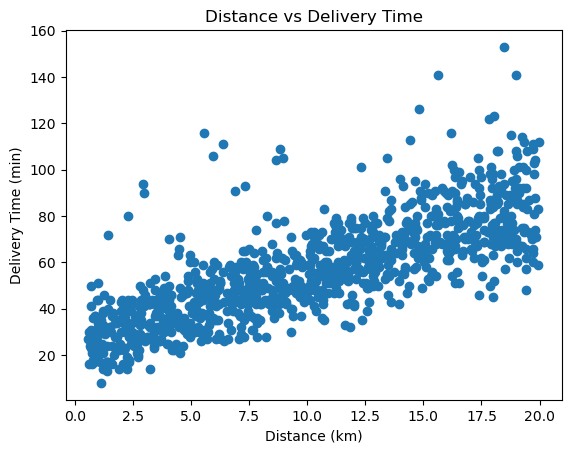

In [10]:
plt.figure()
plt.scatter(df["Distance_km"], df["Delivery_Time_min"])
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (min)")
plt.title("Distance vs Delivery Time")
plt.show()

_**Soru:** Trafik delivery time’ı ne kadar etkiliyor?_

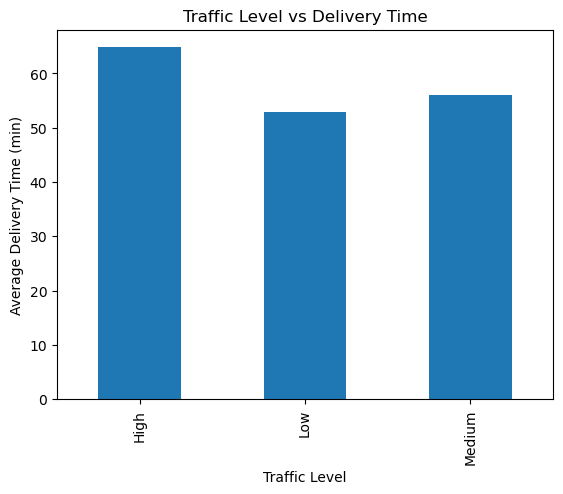

In [11]:
plt.figure()
df.groupby("Traffic_Level")["Delivery_Time_min"].mean().plot(kind="bar")
plt.xlabel("Traffic Level")
plt.ylabel("Average Delivery Time (min)")
plt.title("Traffic Level vs Delivery Time")
plt.show()

_**Soru:** Hava durumu gecikmeye sebep oluyor mu?_

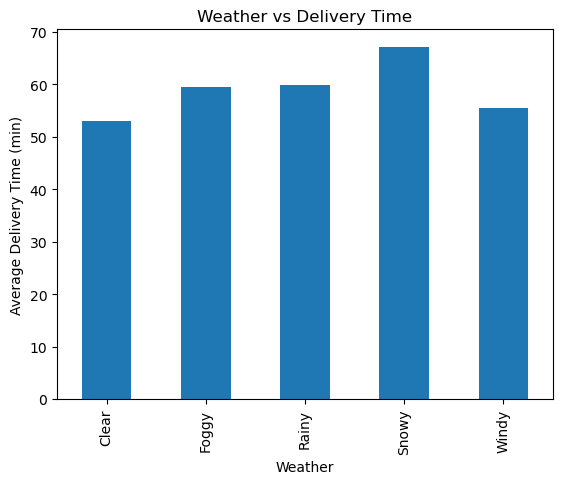

In [12]:
plt.figure()
df.groupby("Weather")["Delivery_Time_min"].mean().plot(kind="bar")
plt.xlabel("Weather")
plt.ylabel("Average Delivery Time (min)")
plt.title("Weather vs Delivery Time")
plt.show()

_**Soru:** Hangi saatlerde teslimat daha yavaş?_

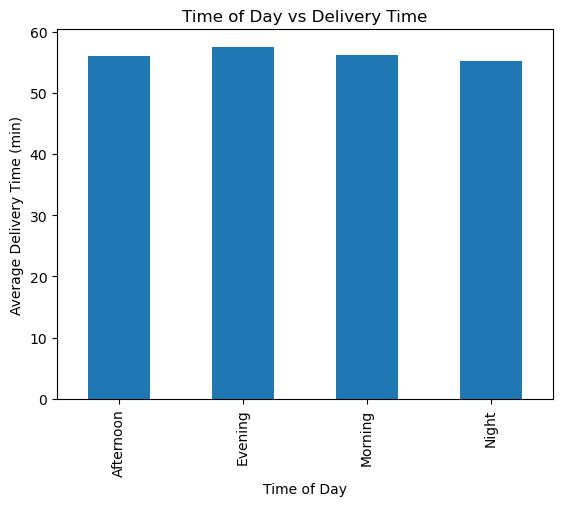

In [13]:
plt.figure()
df.groupby("Time_of_Day")["Delivery_Time_min"].mean().plot(kind="bar")
plt.xlabel("Time of Day")
plt.ylabel("Average Delivery Time (min)")
plt.title("Time of Day vs Delivery Time")
plt.show()

_**Soru:** Deneyimli kurye daha hızlı mı?_

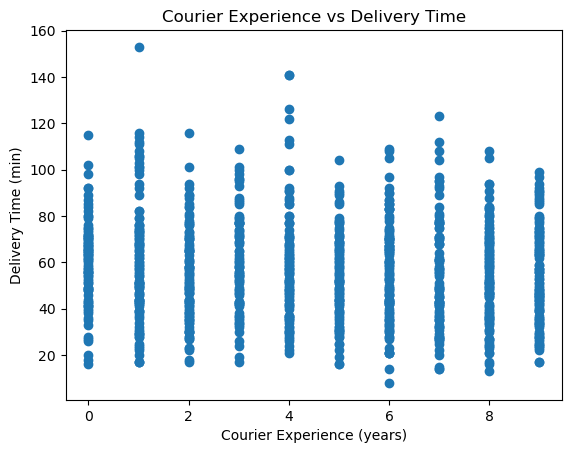

In [14]:
plt.figure()
plt.scatter(df["Courier_Experience_yrs"], df["Delivery_Time_min"])
plt.xlabel("Courier Experience (years)")
plt.ylabel("Delivery Time (min)")
plt.title("Courier Experience vs Delivery Time")
plt.show()

_**Soru:** Hangi araç daha hızlı?_

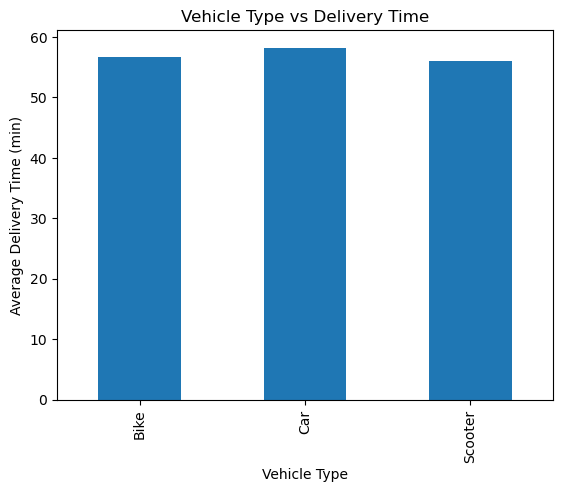

In [15]:
plt.figure()
df.groupby("Vehicle_Type")["Delivery_Time_min"].mean().plot(kind="bar")
plt.xlabel("Vehicle Type")
plt.ylabel("Average Delivery Time (min)")
plt.title("Vehicle Type vs Delivery Time")
plt.show()

_**Soru:** Hazırlık süresi total time’ı nasıl etkiliyor?_

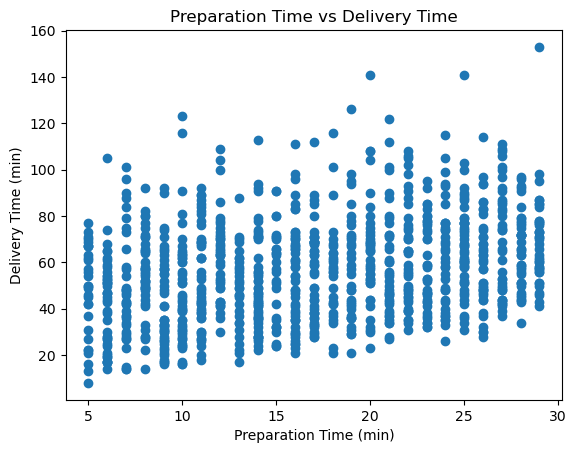

In [16]:
plt.figure()
plt.scatter(df["Preparation_Time_min"], df["Delivery_Time_min"])
plt.xlabel("Preparation Time (min)")
plt.ylabel("Delivery Time (min)")
plt.title("Preparation Time vs Delivery Time")
plt.show()

_**Correlation Heatmap**_

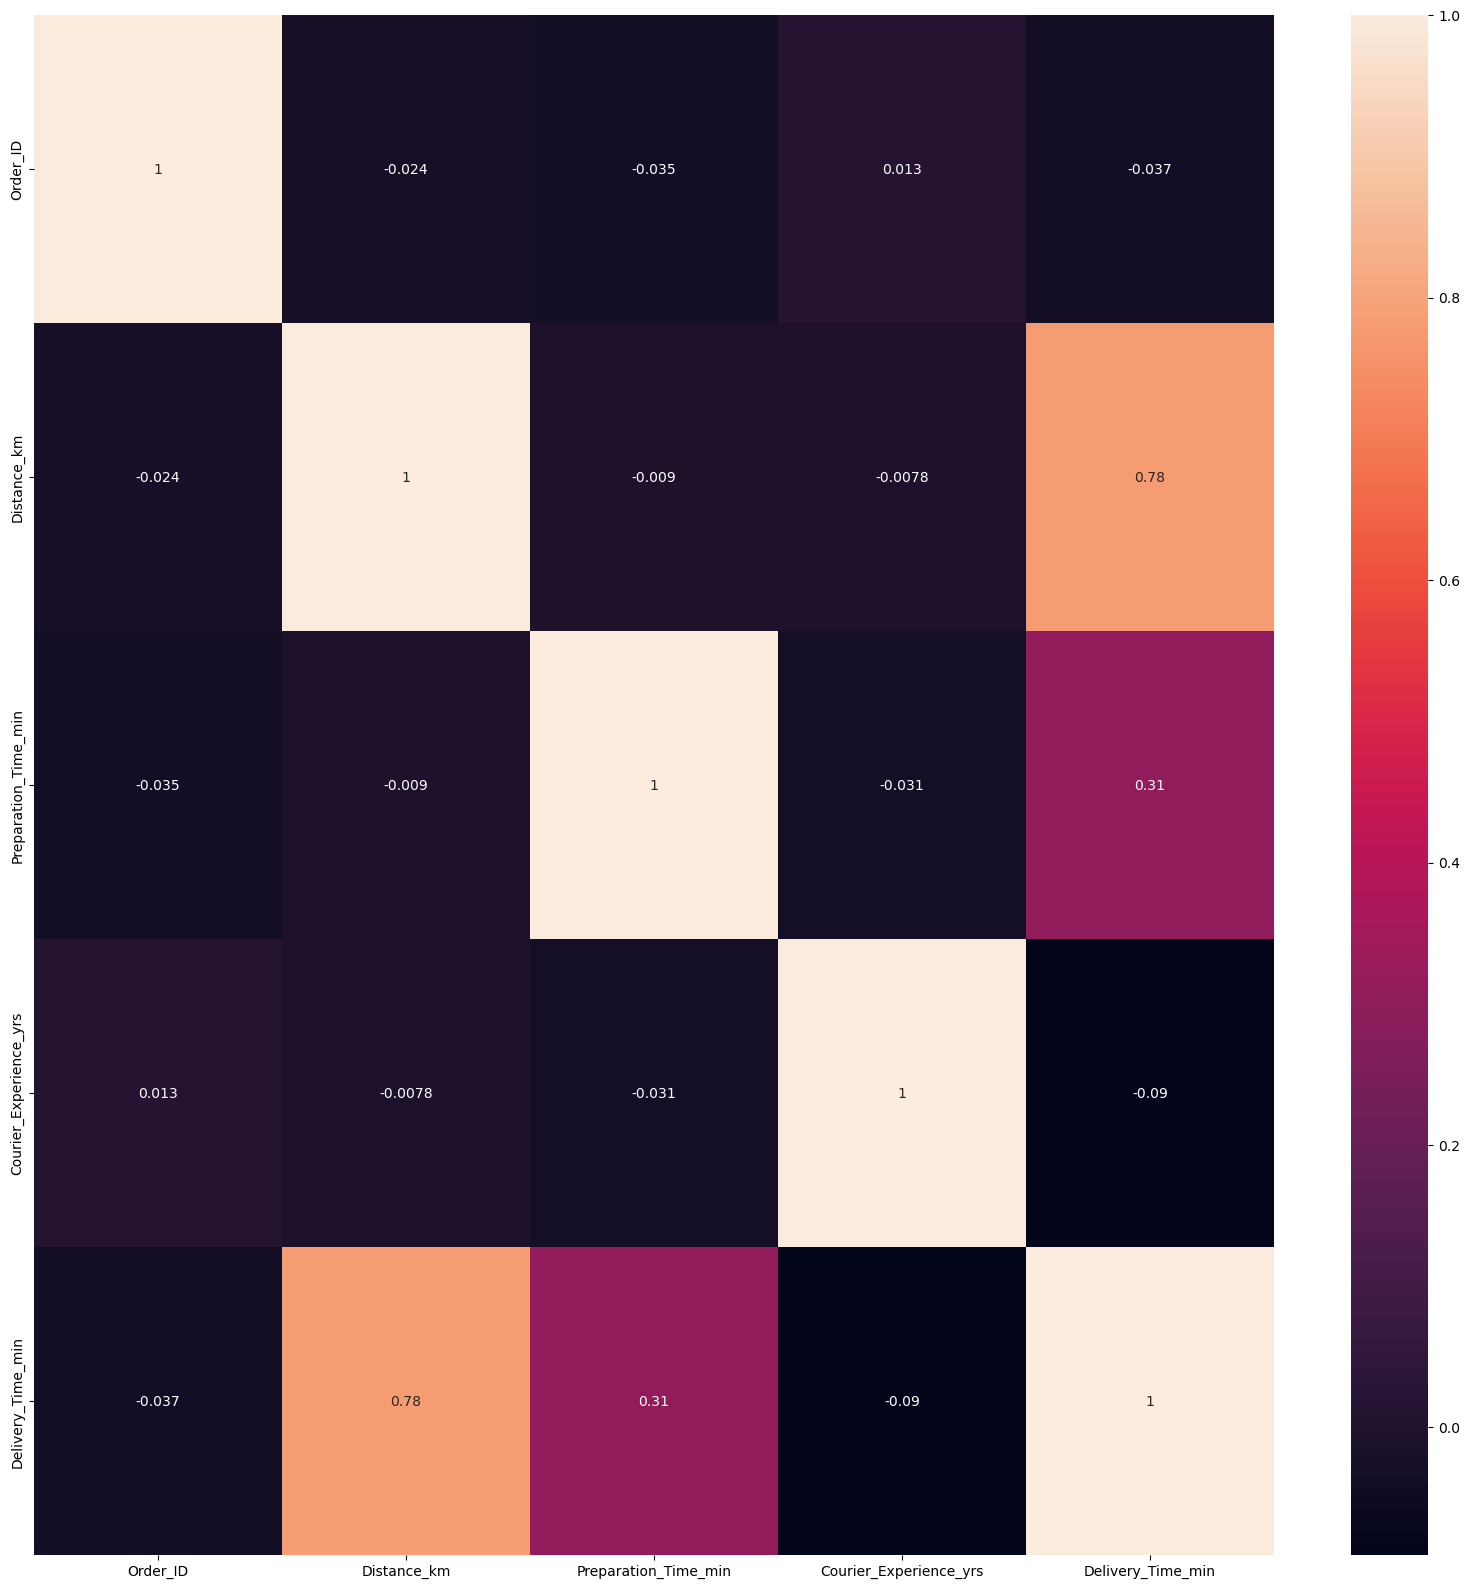

In [17]:
plt.figure(figsize=(20, 20))  

# Grafik boyutlarını ayarlamak için kullanılır. Burada 20x20 inçlik bir boyut belirlenmiş.

sns.heatmap(df.corr(numeric_only=True), annot=True); 
 
# Veri setindeki sayısal sütunlar arasındaki korelasyon matrisini ısı haritası olarak görselleştirir.
# annot=True parametresi, her hücreye korelasyon değerini yazdırır.

**_'Delivery_Time_min' sütunu ile diğer sayısal sütunlar arasındaki korelasyonları alır_**

In [18]:
abs(df.corr(numeric_only=True)['Delivery_Time_min'].sort_values(ascending=False))  

# 'Delivery_Time_min' sütunu ile diğer sayısal sütunlar arasındaki korelasyonları alır.
# abs() fonksiyonu, negatif korelasyonları pozitif hale getirir (mutlak değeri alır).
# sort_values(ascending=False) ise korelasyonları büyükten küçüğe doğru sıralar. True yazsaydık küçükten büyüğe sıralardı.
# Bu, 'Delivery_Time_min' sütunu ile en yüksek korelasyona sahip olan diğer sütunları görmeyi sağlar.

Delivery_Time_min         1.000000
Distance_km               0.780998
Preparation_Time_min      0.307350
Order_ID                  0.036650
Courier_Experience_yrs    0.090433
Name: Delivery_Time_min, dtype: float64

**_Extreme delivery time’ları gösterir_**

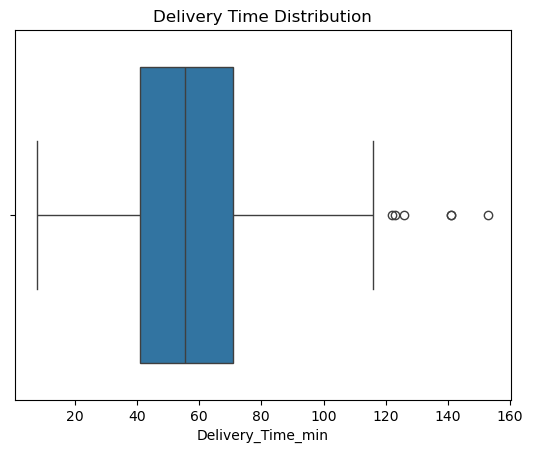

In [19]:
plt.figure()
sns.boxplot(x=df["Delivery_Time_min"])
plt.title("Delivery Time Distribution")
plt.show()

**_Aynı mesafede trafik farkını gösterir_**

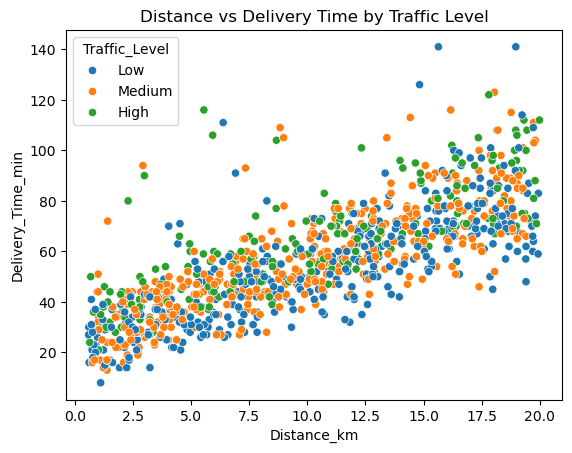

In [20]:
plt.figure()
sns.scatterplot(
    data=df,
    x="Distance_km",
    y="Delivery_Time_min",
    hue="Traffic_Level"
)
plt.title("Distance vs Delivery Time by Traffic Level")
plt.show()

## _Handling Missing Values_

In [21]:
df.isnull().sum()  
# Hangi sütunlarda kaç tane eksik (null) değer olduğunu sayar.

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [22]:
# Order_ID sütununu sil
df.drop("Order_ID", axis=1, inplace=True)

In [23]:
# Kategorik sütunları mode ile doldur
categorical_cols = ["Weather", "Traffic_Level", "Time_of_Day"]

In [24]:
# Kategorik sütunları mode ile doldur
df["Weather"].fillna(df["Weather"].mode()[0], inplace=True)
df["Traffic_Level"].fillna(df["Traffic_Level"].mode()[0], inplace=True)
df["Time_of_Day"].fillna(df["Time_of_Day"].mode()[0], inplace=True)

In [25]:
# Sayısal sütunu median ile doldur
df["Courier_Experience_yrs"].fillna(
    df["Courier_Experience_yrs"].median(),
    inplace=True
)

In [26]:
# Kontrol
df.isnull().sum()

Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64

## _Save Data_

In [27]:
df.to_csv("cleaned_food_delivery_data.csv", index=False)

## _Summary_

_Bu çalışmada, food delivery time prediction problemi için kullanılan veri seti ön işleme adımlarından geçirilmiştir. İlk olarak, veri setindeki eksik değerler incelenmiştir. Analiz sonucunda, bazı kategorik ve sayısal sütunlarda eksik gözlemler olduğu tespit edilmiştir._

_Tahmin sürecine katkı sağlamayan Order_ID sütunu veri setinden çıkarılmıştır. Kategorik değişkenlerdeki eksik değerler, ilgili sütunun en sık görülen değeri (mode) kullanılarak doldurulmuştur. Sayısal bir değişken olan Courier_Experience_yrs sütunundaki eksik değerler ise, olası aykırı değerlerin etkisini azaltmak amacıyla median değer ile doldurulmuştur._

_Veri seti, mevcut haliyle modelleme için anlamlı ve yeterli özellikler içerdiğinden, bu aşamada ek bir feature engineering işlemi uygulanmamıştır. Ön işleme adımları tamamlanan veri seti, makine öğrenmesi modellerinin eğitimi için hazır hale getirilmiştir._